In [1]:
import FC2_train_v2 as FC2_MPO_Net
from neural_networks import *

# Pre-processing

## 1. Train

In [2]:
D = 8
#threshold = 90

In [3]:
# List of layer 1 weights (0-3), layer 1 bias (4), layer 2 weights (5-8), layer 2 bias (9)
weights = FC2_MPO_Net.main(r_1=D, r_2=D)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
Accuracy at step 0: 0.2214
Accuracy at step 1: 0.3742
Accuracy at step 2: 0.4727
Accuracy at step 7: 0.5975
Accuracy at step 8: 0.6186
Accuracy at step 13: 0.6714
Accuracy at step 22: 0.6956
Accuracy at step 24: 0.7094
Accuracy at step 25: 0.7992
Accuracy at step 30: 0.8274
Accuracy at step 33: 0.84
Accuracy at step 34: 0.8518
Ac

## 2. Open weights matrices into correct MPO

In [4]:
sigma = [4, 7, 7, 4]
sigma_prime = [4, 4, 4, 4]
MPO_0, bias_0 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=0)

In [5]:
sigma = [4, 4, 4, 4]
sigma_prime = [1, 10, 1, 1]
MPO_1, bias_1 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=1)

## 3. Check that MPO is correct based on accuracy from model

In [6]:
# def FC2_weights(layer_0, bias_0, layer_1, bias_1):
#     data = input_data.read_data_sets("./data/",validation_size=0,one_hot=True)
    
#     start = time.time()

#     # temp = con.contract_horizontal(MPO_0[0], MPO_0[1], 'right')
#     # temp = con.contract_horizontal(temp, MPO_0[2], 'right')
#     # layer_0 = con.contract_horizontal(temp, MPO_0[3], 'right')

#     # temp = con.contract_horizontal(MPO_1[0], MPO_1[1], 'right')
#     # temp = con.contract_horizontal(temp, MPO_1[2], 'right')
#     # layer_1 = con.contract_horizontal(temp, MPO_1[3], 'right')

#     end = time.time()

#     total = 10000
#     correct = 0
#     for i in range(0, total):
#         t0 = time.time()
#         xW_1 = data.test.images[i] @ layer_0# + bias_0
#         xW_1 = act.ReLU(xW_1)
#         result = xW_1 @ layer_1# + bias_1
#         index = result.argmax()
#         if index == list(data.test.labels[i]).index(1):
#             correct += 1

#     return correct/total*100, end-start

In [7]:
FC2(MPO_0, bias_0, MPO_1, bias_1)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


(93.89, 0.009236812591552734)

## Create new MPO with high bond dimension

In [8]:
# def vector_to_left_canonical_MPS_NN(tensor, phys_dim):
#     """ Decomposes a vector of length d^L (phys_dim^num_sites) into a
#         left-canonical MPS. Final site will not be canonical due to
#         original norm

#     Args:
#         tensor: Vector of length that can be described by d^L (Ex: 512 = 2^9)
#         phys_dim: Physical dimension necessary on MPS at each site (d)
#         num_sites: Number of sites necessary (L)

#     Returns:
#         A_tensors: Left canonical form of input MPS
#     """

#     A_tensors = []
#     num_sites = len(phys_dim)
#     for i in range(0, num_sites-1):
#         # Remove one leg such that tensor has shape (d, d^(L-1)) with L sites
#         if i == 0:
#             reshaped_tensor = np.reshape(tensor, (phys_dim[i],
#                                                   tensor.shape[0]//phys_dim[i]))
#         else:
#             reshaped_tensor = np.reshape(tensor, (A_tensors[-1].shape[1]*phys_dim[i],
#                                                   tensor.shape[1]//phys_dim[i]))       
#         #print("Reshape:", reshaped_tensor.shape)

#         # SVD and save the rank for the next iteration of the loop
#         U, S_vector, V = np.linalg.svd(reshaped_tensor, full_matrices=False)
#         rank = len(S_vector)

#         if i == 0:
#             # No need to reshape since U is already a left-canonical matrix
#             A_tensors.append(U)
#         else:
#             # Break apart first leg of U into a left bond dimension
#             # and physical dimension
#             U = np.reshape(U, (A_tensors[-1].shape[1], phys_dim[i], U.shape[1]))
#             # Transpose so that we have the correct shape
#             # (left bond, right bond, physical dimension)
#             U = np.transpose(U, (0, 2, 1))
#             A_tensors.append(U)

#         # We recreate the tensor with the remaining legs
#         tensor = np.diag(S_vector) @ V
#     # Final A tensor is the remaining tensor after all other legs removed
#     A_tensors.append(tensor.T)

#     return A_tensors

In [9]:
temp = con.contract_horizontal(MPO_0[0], MPO_0[1], 'right')
temp = con.contract_horizontal(temp, MPO_0[2], 'right')
W_0 = con.contract_horizontal(temp, MPO_0[3], 'right')

temp = con.contract_horizontal(MPO_1[0], MPO_1[1], 'right')
temp = con.contract_horizontal(temp, MPO_1[2], 'right')
W_1 = con.contract_horizontal(temp, MPO_1[3], 'right')

In [10]:
vector_W0 = np.reshape(W_0, (W_0.shape[0]*W_0.shape[1]))
MPS_0 = vector_to_left_canonical_MPS_NN(vector_W0, phys_dim=[16,28,28,16])

In [11]:
vector_W1 = np.reshape(W_1, (W_1.shape[0]*W_1.shape[1]))
MPS_1 = vector_to_left_canonical_MPS_NN(vector_W1, phys_dim=[4,40,4,4])

In [12]:
# MPS_0[2].shape

In [13]:
def compress_layer_stop(raw_state, phys_dim, threshold, compressed_state=0, plot=0, starting_point=1, stopping_point=9):
    """ Initializes a compressed state then sweeps left->right
        and right->left until a minimum is reached
        i.e. the difference in our metrics between sweeps is less than a
        specified threshold up to the bond dimension of the raw state

        Note: Does NOT normalize the state unlike the compression function
              found in compression.py

    Args:
        raw_state: MPS to be compressed
        phys_dim: List of physical dimensions by site
        threshold: Difference between sweeps under which a solution is found
        compressed_state: Initial starting state if necessary
                          otherwise a random MPS is ini
        plot: Whether or not to plot the compression values (0 off, 1 on)

    Returns:
        compressions: Final compressed state at each bond dimension
        best_dist: List of overlap values for each bond dimension
        best_sim: List of cosine similarity values for each bond dimension
    """
    if compressed_state == 0:
        compressed_state = init.initialize_random_MPS_with_changing_phys_dim(phys_dim,
                                                                             num_sites=len(raw_state),
                                                                             bond_dim=starting_point)
    bond_dim_raw_state = raw_state[math.ceil(len(raw_state)/2)].shape[0]
    max_bond_dim = starting_point

    # Initialize accuracy metrics
    dist = []  # Frobenius norm
    sim = []   # Cosine similarity (Scalar product)
    dist.append(metrics.overlap(compressed_state, raw_state))
    sim.append(metrics.similarity(compressed_state, raw_state))
    best_dist = []
    best_sim = []
    compressions = []
    # We sweep left to right and then back right to left across the mixed state
    while True:
        # Left->right sweep
        for site in range(0, len(raw_state)-1):
            compressed_state[site], compressed_state[site+1] = comp.update_site(compressed_state, raw_state,
                                                                           site=site, dir='right')
        # Right->left sweep
        for site in range(len(raw_state)-1, 0, -1):
            compressed_state[site], compressed_state[site-1] = comp.update_site(compressed_state, raw_state,
                                                                           site=site, dir='left')

        # Metrics taken after each sweep
        dist.append(metrics.overlap(compressed_state, raw_state))
        sim.append(metrics.similarity(compressed_state, raw_state))
        # Check if sweeps are still working
        if np.abs(dist[-2]-dist[-1]) < threshold:
            # Normalize to maintain length and update metrics
            #compressed_state, _ = can.left_normalize(compressed_state)
            best_dist.append(dist[-1])
            best_sim.append(sim[-1])
            print("Sim:", best_sim[-1], "Dist:", best_dist[-1], "BondDim:", max_bond_dim)
            compressions.append(compressed_state[:])

            # Break if we cannot increase bond dimension anymore
            if max_bond_dim+1 == bond_dim_raw_state or max_bond_dim+1 == stopping_point:
                break

            # Break if changing bond dimension did not do enough
            #if len(best_dist) > 1 and np.abs(best_dist[-2]-best_dist[-1] < threshold):
            #    break

            # Update each tensor by increasing bond dimension
            for i, tensor in enumerate(compressed_state):
                if tensor.ndim == 2:
                    new_tensor = np.zeros((tensor.shape[0], tensor.shape[1]+1))
                    new_tensor[:tensor.shape[0], :tensor.shape[1]] = tensor
                    compressed_state[i] = new_tensor

                elif tensor.ndim == 3:
                    new_tensor = np.zeros((tensor.shape[0]+1, tensor.shape[1]+1, tensor.shape[2]))
                    new_tensor[:tensor.shape[0], :tensor.shape[1], :tensor.shape[2]] = tensor
                    compressed_state[i] = new_tensor
            max_bond_dim = compressed_state[math.ceil(len(compressed_state)/2)].shape[0]

    if plot == 1:
        max_bond_dim = range(1, len(best_dist)+1)
        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Compressed Dimension')
        ax1.set_ylabel('Cosine Similarity', color=color)
        ax1.plot(max_bond_dim, best_sim, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Euclidean Distance', color=color)
        ax2.plot(max_bond_dim, best_dist, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title('Metrics vs. Compressed Dimension')

        fig.tight_layout()
        plt.show()

        plt.figure()
        plt.title("Cosine Similarity vs. Euclidean Distance")
        plt.xlabel("Euclidean Distance")
        plt.ylabel("Cosine Similarity")

        plt.plot(best_dist, best_sim)

    return compressions, best_dist, best_sim

In [14]:
# compressed_MPS_0, dist, sim = compress_layer_stop(MPS_0, phys_dim=[16,28,28,16], threshold=1e-3, plot=0, stopping_point=5)

In [15]:
# compressed_MPS_1, dist, sim = compress_layer(MPS_1, phys_dim=[4, 40, 4, 4], threshold=1e-3, plot=0)

In [16]:
# for i in range(len(compressed_MPS_1)):
#     if i >= 7:
#         j = 6
#     else:
#         j = i
#     print(j)
#     temp = con.contract_horizontal(compressed_MPS_0[j][0], compressed_MPS_0[j][1], 'right')
#     temp = con.contract_horizontal(temp, compressed_MPS_0[j][2], 'right')
#     layer_0 = con.contract_horizontal(temp, compressed_MPS_0[j][3], 'right')

#     temp = con.contract_horizontal(compressed_MPS_1[i][0], compressed_MPS_1[i][1], 'right')
#     temp = con.contract_horizontal(temp, compressed_MPS_1[i][2], 'right')
#     layer_1 = con.contract_horizontal(temp, compressed_MPS_1[i][3], 'right')

#     layer_0 = np.reshape(layer_0, (W_0.shape[0], W_0.shape[1]))
#     layer_1 = np.reshape(layer_1, (W_1.shape[0], W_1.shape[1]))
#     acc, _ = FC2_weights(layer_0, bias_0, layer_1, bias_1)
#     print(acc)

In [17]:
# ### Maximizing total accuracy
# acc_orig, time_orig = FC2(MPS_0, bias_0, MPS_1, bias_1)

# acc_compressed = []
# time_compressed = []
# params = []
# if len(compressed_MPS_0) > len(compressed_MPS_1):
#     shortest = len(compressed_MPS_1)
#     longest = len(compressed_MPS_0)
# else:
#     shortest = len(compressed_MPS_0)
#     longest = len(compressed_MPS_1)

# for new_dim in range(1, longest+1):
#     if new_dim < shortest:
#         MPS_0_test = compressed_MPS_0[new_dim-1]
#         MPS_1_test = compressed_MPS_1[new_dim-1]
#     else:
#         if shortest == len(compressed_MPS_0):
#             MPS_0_test = compressed_MPS_0[-1]
#             MPS_1_test = compressed_MPS_1[new_dim-1]
#         elif shortest == len(compressed_MPS_1):
#             MPS_0_test = compressed_MPS_0[new_dim-1]
#             MPS_1_test = compressed_MPS_1[-1]


#     ############################
#     MPS_1_test = compressed_MPS_1[-1]
#     dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
#     dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
#     MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
#     MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)
#     #MPO_1_test = open_legs(compressed_MPS_1[-1], sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)
#     total_params = 0
#     for tensor in MPO_0_test:
#         total_params += tensor.size
#     for tensor in MPO_1_test:
#         total_params += tensor.size
#     params.append(total_params)

#     acc, t = FC2(MPO_0_test, bias_0, MPO_1_test, bias_1)
#     acc_compressed.append(acc)
#     time_compressed.append(t)

#     ############################

#     # total_params = 0
#     # for tensor in MPS_0_test:
#     #     total_params += tensor.size
#     # for tensor in MPS_1_test:
#     #     total_params += tensor.size
#     # params.append(total_params)

#     # acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
#     # acc_compressed.append(acc)
#     # time_compressed.append(t)

# params_orig = 0
# for tensor in MPS_0:
#     params_orig += tensor.size
# for tensor in MPS_1:
#     params_orig += tensor.size

# #acc_compressed.pop()
# #time_compressed.pop()
# #params.pop()
# x = range(1, longest+1)
# loss = [acc_orig-x for x in acc_compressed]
# params = np.array(params)/params_orig*100


# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Compressed Dimension')
# ax1.set_ylabel('Accuracy [%]', color=color)
# ax1.plot(x, loss, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.axhline(acc_orig, color='r', linestyle='--')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Compression [%]', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, params, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Accuracy vs. Compressed Dimension')
# fig.tight_layout()
# plt.show()

# plt.figure()
# plt.plot(x, time_compressed)
# plt.title('Contraction Time vs. Compressed Dimension')
# plt.xlabel('Time [s]')
# plt.ylabel('Compressed Dimension')
# plt.axhline(time_orig, color='r', linestyle='--')

In [18]:
vector_W0 = np.reshape(W_0, (W_0.shape[0]*W_0.shape[1]))
MPS_0 = vector_to_left_canonical_MPS_NN(vector_W0, phys_dim=[4, 4, 28, 28, 4, 4])

vector_W1 = np.reshape(W_1, (W_1.shape[0]*W_1.shape[1]))
MPS_1 = vector_to_left_canonical_MPS_NN(vector_W1, phys_dim=[2, 2, 8, 20, 2, 2])

Sim: 0.008404346300639347 Dist: 48.87058818861752 BondDim: 1
Sim: 0.011905467508923686 Dist: 48.78423587820173 BondDim: 2
Sim: 0.031749414339540184 Dist: 48.2918833572859 BondDim: 3
Sim: 0.05083813174452299 Dist: 47.81348506770255 BondDim: 4


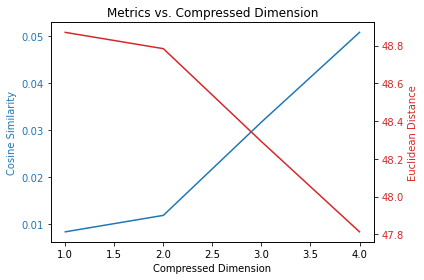

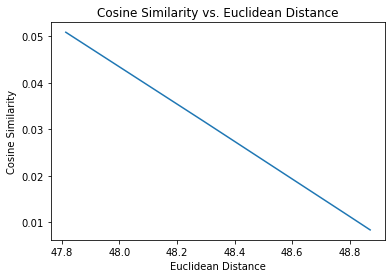

In [19]:
compressed_MPS_0, dist0, sim0 = compress_layer_stop(MPS_0, phys_dim=[4, 4, 28, 28, 4, 4], threshold=1e-1, plot=1, starting_point=1, stopping_point=5)

Sim: 0.05167332495701258 Dist: 8.207310548975753 BondDim: 1
Sim: 0.17646197725805085 Dist: 7.648278802457299 BondDim: 2
Sim: 0.3075172281291126 Dist: 7.013363838850279 BondDim: 3
Sim: 0.4291305551627568 Dist: 6.36781272465142 BondDim: 4
Sim: 0.5063669281232794 Dist: 5.921394655815916 BondDim: 5
Sim: 0.5743399490127559 Dist: 5.498615216417214 BondDim: 6
Sim: 0.6313747064788782 Dist: 5.116988593803079 BondDim: 7
Sim: 0.6795686056968332 Dist: 4.770780253113579 BondDim: 8
Sim: 0.7190547973484958 Dist: 4.467172195689457 BondDim: 9
Sim: 0.7557578851767413 Dist: 4.165164508319694 BondDim: 10
Sim: 0.7874043879482663 Dist: 3.8859663132227613 BondDim: 11
Sim: 0.8154574244148962 Dist: 3.6205135067223626 BondDim: 12
Sim: 0.8369825233023502 Dist: 3.4028199199007325 BondDim: 13
Sim: 0.8572359301789142 Dist: 3.184427334963473 BondDim: 14
Sim: 0.8743540116149893 Dist: 2.987419398566128 BondDim: 15
Sim: 0.8911261486303771 Dist: 2.7808891414127745 BondDim: 16
Sim: 0.9061094883795547 Dist: 2.582454842113

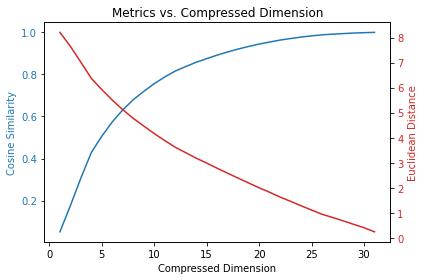

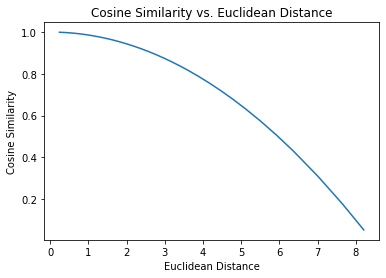

In [34]:
compressed_MPS_1, dist1, sim1 = compress_layer(MPS_1, phys_dim=[2, 2, 8, 20, 2, 2], threshold=1e-8, plot=1)

In [35]:
# def FC2_more_sites(MPO_0, bias_0, MPO_1, bias_1, W_0, W_1):
#     data = input_data.read_data_sets("./data/",validation_size=0,one_hot=True)
    
#     start = time.time()

#     temp = con.contract_horizontal(MPO_0[0], MPO_0[1], 'right')
#     temp = con.contract_horizontal(temp, MPO_0[2], 'right')
#     temp = con.contract_horizontal(temp, MPO_0[3], 'right')
#     temp = con.contract_horizontal(temp, MPO_0[4], 'right')
#     layer_0 = con.contract_horizontal(temp, MPO_0[5], 'right')

#     temp = con.contract_horizontal(MPO_1[0], MPO_1[1], 'right')
#     temp = con.contract_horizontal(temp, MPO_1[2], 'right')
#     temp = con.contract_horizontal(temp, MPO_1[3], 'right')
#     temp = con.contract_horizontal(temp, MPO_1[4], 'right')
#     layer_1 = con.contract_horizontal(temp, MPO_1[5], 'right')

#     layer_0 = np.reshape(layer_0, (W_0.shape[0], W_0.shape[1]))
#     layer_1 = np.reshape(layer_1, (W_1.shape[0], W_1.shape[1]))
#     end = time.time()

#     total = 10000
#     correct = 0
#     for i in range(0, total):
#         t0 = time.time()
#         xW_1 = data.test.images[i] @ layer_0 + bias_0
#         xW_1 = act.ReLU(xW_1)
#         result = xW_1 @ layer_1 + bias_1
#         index = result.argmax()
#         if index == list(data.test.labels[i]).index(1):
#             correct += 1

#     return correct/total*100, end-start

In [36]:
# ### Maximizing total accuracy
# acc_orig, time_orig = FC2_more_sites(MPS_0, bias_0, MPS_1, bias_1, W_0, W_1)

# acc_compressed = []
# time_compressed = []
# params = []
# if len(compressed_MPS_0) > len(compressed_MPS_1):
#     shortest = len(compressed_MPS_1)
#     longest = len(compressed_MPS_0)
# else:
#     shortest = len(compressed_MPS_0)
#     longest = len(compressed_MPS_1)

# for new_dim in range(1, longest+1):
#     if new_dim < shortest:
#         MPS_0_test = compressed_MPS_0[new_dim-1]
#         MPS_1_test = compressed_MPS_1[new_dim-1]
#     else:
#         if shortest == len(compressed_MPS_0):
#             MPS_0_test = compressed_MPS_0[-1]
#             MPS_1_test = compressed_MPS_1[new_dim-1]
#         elif shortest == len(compressed_MPS_1):
#             MPS_0_test = compressed_MPS_0[new_dim-1]
#             MPS_1_test = compressed_MPS_1[-1]

#     total_params = 0
#     for tensor in MPS_0_test:
#         total_params += tensor.size
#     for tensor in MPS_1_test:
#         total_params += tensor.size
#     params.append(total_params)

#     #########
#     MPS_0_test = close_legs(MPO_0)
#     acc, t = FC2_more_sites(MPS_0_test, bias_0, MPS_1_test, bias_1, W_0, W_1)
#     acc_compressed.append(acc)
#     time_compressed.append(t)

# params_orig = 0
# for tensor in MPS_0:
#     params_orig += tensor.size
# for tensor in MPS_1:
#     params_orig += tensor.size

# x = range(1, longest+1)
# params = np.array(params)/params_orig*100
# loss = [acc_orig-x for x in acc_compressed]

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Compressed Dimension')
# ax1.set_ylabel('Loss [%]', color=color)
# ax1.plot(x, loss, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #ax1.axhline(acc_orig, color='r', linestyle='--')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('Compression [%]', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, params, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Loss vs. Compressed Dimension')
# fig.tight_layout()
# plt.show()

# plt.figure()
# plt.plot(x, time_compressed)
# plt.title('Contraction Time vs. Compressed Dimension')
# plt.xlabel('Time [s]')
# plt.ylabel('Compressed Dimension')
# plt.axhline(time_orig, color='r', linestyle='--')

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 0
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 1
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 2
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 3
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


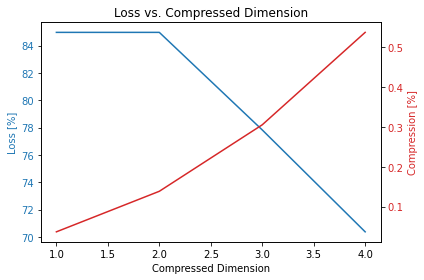

Text(0, 0.5, 'Loss [%]')

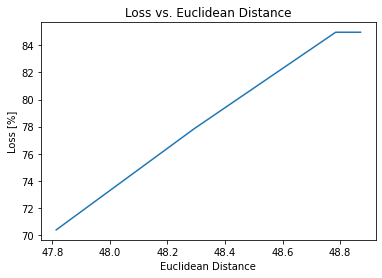

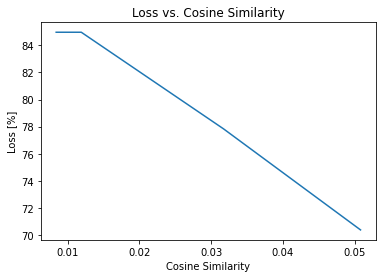

In [37]:
### Accuracy when compressing W_0
acc_orig, time_orig = FC2(MPS_0, bias_0, MPS_1, bias_1)

acc_compressed = []
time_compressed = []
params = []
for i in range(0, len(compressed_MPS_0)):
    print("dim:", i)
    MPS_0_test = compressed_MPS_0[i]
    MPS_1_test = MPS_1

    acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
    acc_compressed.append(acc)
    time_compressed.append(t)

    total_params = 0
    for tensor in MPS_0_test:
        total_params += tensor.size
    params.append(total_params)

params_orig = 768*256
x = range(1, len(compressed_MPS_0)+1)
params = np.array(params)/params_orig*100
loss = [acc_orig-x for x in acc_compressed]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Compressed Dimension')
ax1.set_ylabel('Loss [%]', color=color)
ax1.plot(x, loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Compression [%]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, params, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Loss vs. Compressed Dimension')
fig.tight_layout()
plt.show()

plt.figure()
plt.plot(dist0, loss)
plt.title('Loss vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Loss [%]')

plt.figure()
plt.plot(sim0, loss)
plt.title('Loss vs. Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Loss [%]')

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 0
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 1
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 2
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 3
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 4
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels

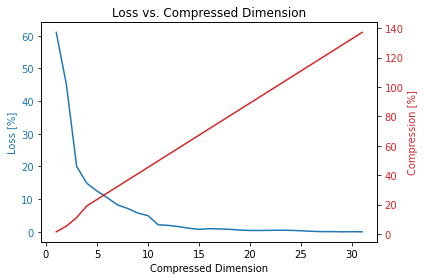

Text(0, 0.5, 'Loss [%]')

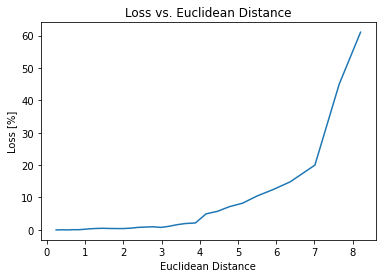

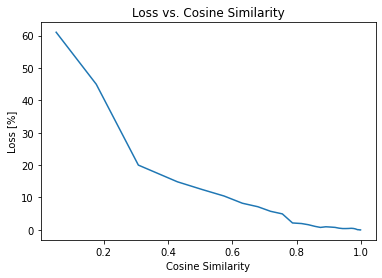

In [38]:
### Accuracy when compressing W_1
acc_orig, time_orig = FC2(MPS_0, bias_0, MPS_1, bias_1)

acc_compressed = []
time_compressed = []
params = []
for i in range(0, len(compressed_MPS_1)):
    print("dim:", i)

    MPS_0_test = MPS_0
    MPS_1_test = compressed_MPS_1[i]

    acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
    acc_compressed.append(acc)
    time_compressed.append(t)

    total_params = 0
    for tensor in MPS_1_test:
        total_params += tensor.size
    params.append(total_params)

params_orig = 256*10
x = range(1, len(compressed_MPS_1)+1)
params = np.array(params)/params_orig*100
loss = [acc_orig-x for x in acc_compressed]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Compressed Dimension')
ax1.set_ylabel('Loss [%]', color=color)
ax1.plot(x, loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Compression [%]', color=color)  # we already handled the x-label with ax1
ax2.plot(x, params, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Loss vs. Compressed Dimension')
fig.tight_layout()
plt.show()

plt.figure()
plt.plot(dist1, loss)
plt.title('Loss vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Loss [%]')

plt.figure()
plt.plot(sim1, loss)
plt.title('Loss vs. Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Loss [%]')

In [58]:
### Check changes in W0 for constant W1
acc_compressed = []
time_compressed = []
W1_dim = len(compressed_MPS_1)
MPS_1_test = MPS_1
params0 = []
for W0_dim in range(1, len(compressed_MPS_0)+1):
    print("dim:", W0_dim)
    MPS_0_test = compressed_MPS_0[W0_dim-1]

    #dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
    #dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
    #MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
    #MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)

    acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
    acc_compressed.append(acc)
    time_compressed.append(t)
    total_params = 0
    for tensor in MPS_0_test:
        total_params += tensor.size
    params0.append(total_params)

params_orig = 768*256
acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
loss0 = [acc_orig-x for x in acc_compressed]
params0 = np.array(params0)/params_orig*100

acc_compressed = []
time_compressed = []
W0_dim = len(compressed_MPS_0)
MPS_0_test = MPS_0
params1 = []
for W1_dim in range(1, len(compressed_MPS_1)+1):
    print("dim:", W1_dim)
    MPS_1_test = compressed_MPS_1[W1_dim-1]

    #dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
    #dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
    #MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
    #MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)

    acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
    #acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
    acc_compressed.append(acc)
    time_compressed.append(t)
    total_params = 0
    for tensor in MPS_1_test:
        total_params += tensor.size
    params1.append(total_params)

params_orig = 256*10
acc_orig, time_orig = FC2(MPS_0, bias_0, MPS_1, bias_1)
loss1 = [acc_orig-x for x in acc_compressed]
params1 = np.array(params1)/params_orig*100


dim: 1
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 2
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 3
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 4
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
dim: 1
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels

Text(0, 0.5, 'Loss [%]')

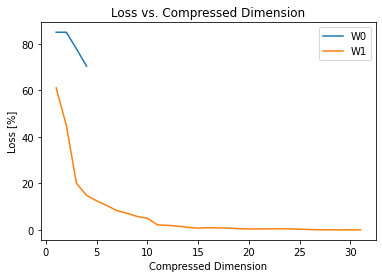

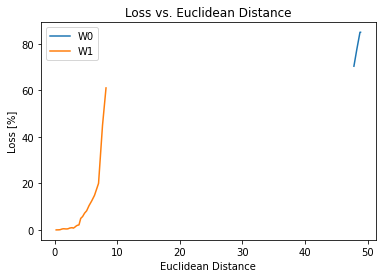

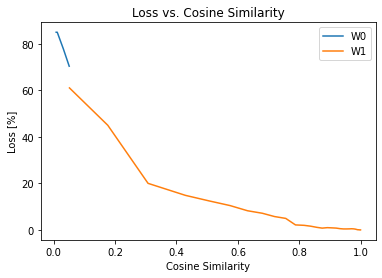

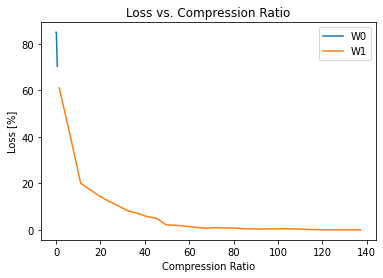

In [59]:
plt.figure()

plt.plot(range(1, len(compressed_MPS_0)+1), loss0, label="W0")
plt.plot(range(1, len(compressed_MPS_1)+1), loss1, label="W1")

plt.legend()
plt.title('Loss vs. Compressed Dimension')
plt.xlabel('Compressed Dimension')
plt.ylabel('Loss [%]')

plt.figure()
plt.plot(dist0, loss0, label="W0")
plt.plot(dist1, loss1, label="W1")
plt.legend()
plt.title('Loss vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Loss [%]')

plt.figure()
plt.plot(sim0, loss0, label="W0")
plt.plot(sim1, loss1, label="W1")
plt.legend()
plt.title('Loss vs. Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Loss [%]')

plt.figure()
plt.plot(params0, loss0, label="W0")
plt.plot(params1, loss1, label="W1")
plt.legend()
plt.title('Loss vs. Compression Ratio')
plt.xlabel('Compression Ratio')
plt.ylabel('Loss [%]')

mages-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
E

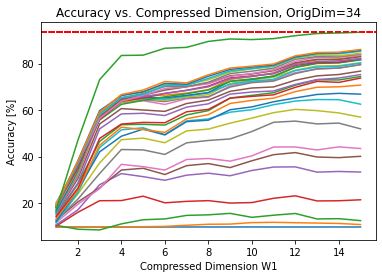

In [62]:
### Check changes in W1 for constant W0
acc_orig, _ = FC2_more_sites(MPS_0, bias_0, MPS_1, bias_1, W_0, W_1)
plt.figure()
for W0_dim in range(1, len(compressed_MPS_0)+1):
    acc_compressed = []
    time_compressed = []
    MPS_0_test = compressed_MPS_0[W0_dim-1]
    for W1_dim in range(1, len(compressed_MPS_1)+1):
        MPS_1_test = compressed_MPS_1[W1_dim-1]

        #dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
        #dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
        #MPO_0_test = open_legs(MPS_0_test, MPO_0, bond_dim=dim_0)
        #MPO_1_test = open_legs(MPS_1_test, MPO_1, bond_dim=dim_1)

        acc, t = FC2_more_sites(MPS_0_test, bias_0, MPS_1_test, bias_1, W_0, W_1)
        acc_compressed.append(acc)
        time_compressed.append(t)


    #acc_orig = acc_compressed[-1]
    #acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
    plt.plot(range(1, len(compressed_MPS_1)), acc_compressed, label="W0_dim=%d" % W0_dim)
    plt.axhline(acc_orig, color='r', linestyle='--')
    #plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.title('Accuracy vs. Compressed Dimension, OrigDim=%d' %(len(compressed_MPS_0)+1))
    plt.xlabel('Compressed Dimension W1')
    plt.ylabel('Accuracy [%]')